POSTTEST 7 PRAKTIKUM KECERDASAN BUATAN

NAMA : MOHAMMAD FHADIL HAFIDS HARSANDI
NIM  : 2109106072

LINK DATASET = https://drive.google.com/drive/folders/1QuANciExAjr8ayAJ5SttM5EpEebQUYE9?usp=sharing

IMPORT LIBRARY

In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
import os,shutil

MEMBACA DATASET

In [62]:
data = "Split_test_val"
class_names = ["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]

Split dataset menjadi train,val dan test

In [63]:
for i in ["Train", "Test", "Validation"]:
    split_data = os.path.join(data, i)
    os.makedirs(split_data, exist_ok=True)
    
    for class_name in class_names:
        class_data = os.path.join(split_data, class_name)
        os.makedirs(class_data, exist_ok=True)
        
image_counts = {
    "airplane": 727, "car": 968, "cat": 885, "dog": 702,
    "flower": 843, "fruit": 1000, "motorbike": 788, "person": 986
}

split_ratios = [0.6, 0.2, 0.2]

In [64]:
for class_name in class_names:
    class_data = f"natural_images/{class_name}"
    for i, split in enumerate(["Train", "Test", "Validation"]):
        start_idx = int(image_counts[class_name] * sum(split_ratios[:i]))
        end_idx = int(image_counts[class_name] * sum(split_ratios[:i+1]))
        for fname in os.listdir(class_data)[start_idx:end_idx]:
            src = os.path.join(class_data, fname)
            dst = os.path.join(data, split, class_name, fname)
            shutil.copyfile(src, dst)
            
train_dir = "Split_test_val/Train"
test_dir = "Split_test_val/Test"
validation_dir = "Split_test_val/Validation"

Gunakan sequential model

In [65]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(16, activation = "relu")) 
model.add(layers.Dense(8, activation = "softmax"))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

Gunakan accuracy sebagai metrics

In [69]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']  
)

Lakukan evaluasi model terhadap data test

In [75]:
test_datagen = ImageDataGenerator(rescale=1./255) 
validation_datagen = ImageDataGenerator(rescale=1./255) 

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical' 
)

# Evaluasi model data test
test_loss, test_accuracy = model.evaluate(test_generator)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical' 
)
# Evaluasi model data validation
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Found 1380 images belonging to 8 classes.
44/44 [==============================] - 13s 290ms/step - loss: 2.0814 - accuracy: 0.1283
Found 1383 images belonging to 8 classes.
44/44 [==============================] - 13s 290ms/step - loss: 2.0812 - accuracy: 0.1280
Test loss: 2.081369400024414
Test accuracy: 0.12826086580753326


Lakukan evaluasi model terhadap data test

Epoch 1/10
44/44 [==============================] - 72s 2s/step - loss: 2.0632 - accuracy: 0.1341 - val_loss: 2.0279 - val_accuracy: 0.1345
Epoch 2/10
44/44 [==============================] - 74s 2s/step - loss: 1.9479 - accuracy: 0.1710 - val_loss: 1.7930 - val_accuracy: 0.2155
Epoch 3/10
44/44 [==============================] - 72s 2s/step - loss: 1.7896 - accuracy: 0.2862 - val_loss: 1.6154 - val_accuracy: 0.4027
Epoch 4/10
44/44 [==============================] - 71s 2s/step - loss: 1.5335 - accuracy: 0.4558 - val_loss: 1.3677 - val_accuracy: 0.4910
Epoch 5/10
44/44 [==============================] - 71s 2s/step - loss: 1.3817 - accuracy: 0.5022 - val_loss: 1.2115 - val_accuracy: 0.5879
Epoch 6/10
44/44 [==============================] - 72s 2s/step - loss: 1.2016 - accuracy: 0.5833 - val_loss: 1.2008 - val_accuracy: 0.5568
Epoch 7/10
44/44 [==============================] - 71s 2s/step - loss: 1.0915 - accuracy: 0.6464 - val_loss: 1.2495 - val_accuracy: 0.5488
Epoch 8/10
44/44 [==

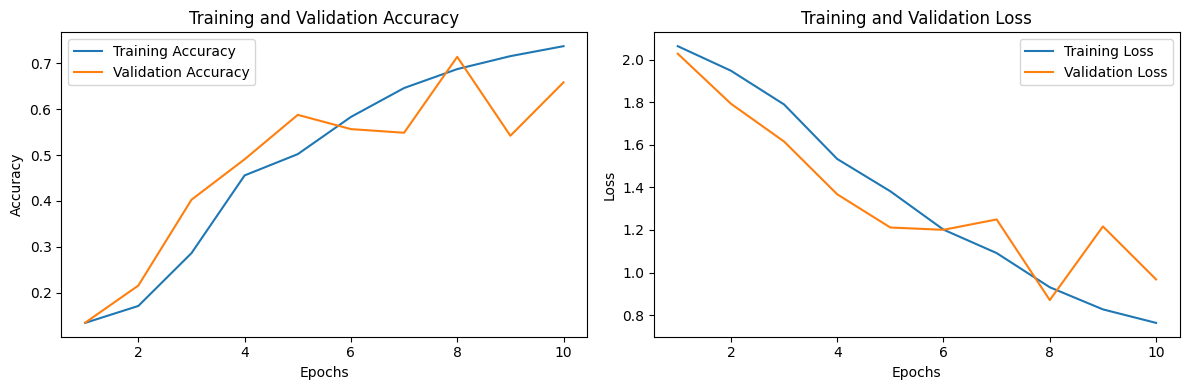

In [76]:
epochs = 10
history = model.fit(
    test_generator,
    epochs=epochs,
    validation_data=validation_generator
)


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# akurasi plot training dan validation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training dan validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()